In [105]:
import sys
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import date
import seaborn as sns

pd.set_option('display.max_rows', 5000)

In [31]:
total_data = pd.read_csv('C:\\Users\\ashto\\Desktop\\INFO Raw Data.csv')
total_data['Driver'] = total_data['Driver'].str.rsplit(' ',1).str[0]
total_data['Driver'] = total_data['Driver'].str.replace('  ', ' ')
total_data['Driver'] = total_data['Driver'].str.replace('   ', ' ')
total_data['Driver'] = total_data['Driver'].str.replace('RÃ¤ikkÃ¶nen','Raikkonen')

In [54]:
total_data = total_data.rename(columns={'Pos_x':'Ending Position','Pos_y':'Starting Position'})
total_data = total_data[['Driver','Car','Laps','Time/Retired','PTS','Starting Position','Ending Position','Year']]
total_data.loc[total_data['Ending Position'] == 'NC', 'Ending Position'] = 0

total_data.head(1000)
#total_data['Starting Position'])

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year
0,Alain Prost,Williams Renault,72.0,1:38:45.082,10,1.0,1,1993
1,Ayrton Senna,McLaren Ford,72.0,+79.824s,6,2.0,2,1993
2,Mark Blundell,Ligier Renault,71.0,+1 lap,4,8.0,3,1993
3,Christian Fittipaldi,Minardi Ford,71.0,+1 lap,3,13.0,4,1993
4,Jyrki Jarvilehto,Sauber,70.0,+2 laps,2,6.0,5,1993
5,Gerhard Berger,Ferrari,69.0,DNF,1,15.0,6,1993
6,Derek Warwick,Footwork Mugen Honda,69.0,DNF,0,22.0,7,1993
7,Martin Brundle,Ligier Renault,57.0,DNF,0,12.0,0,1993
8,Michele Alboreto,Lola Ferrari,55.0,DNF,0,25.0,0,1993
9,Erik Comas,Larrousse Lamborghini,51.0,DNF,0,19.0,0,1993


In [28]:
total_data.to_csv('C:\\Users\\ashto\\Desktop\\INFO Data Cleaner.csv')

In [ ]:
#now i need to clean data like what we did in phase 2, LIKE set all ending and starting positions to 0 for those NC and do ANALYSIS

In [67]:
total_data.loc[total_data['Ending Position'] == 'DQ', 'Ending Position'] = 0
total_data['Starting Position'] = int(total_data['Starting Position'])

TypeError: cannot convert the series to <class 'int'>

In [74]:
pd.to_numeric(total_data['Starting Position'],errors='coerce')
total_data['Positions Gained'] = total_data['Starting Position'] - total_data['Ending Position']
total_data.head()

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained
0,Alain Prost,Williams Renault,72.0,1:38:45.082,10,1.0,1,1993,0.0
1,Ayrton Senna,McLaren Ford,72.0,+79.824s,6,2.0,2,1993,0.0
2,Mark Blundell,Ligier Renault,71.0,+1 lap,4,8.0,3,1993,5.0
3,Christian Fittipaldi,Minardi Ford,71.0,+1 lap,3,13.0,4,1993,9.0
4,Jyrki Jarvilehto,Sauber,70.0,+2 laps,2,6.0,5,1993,1.0


In [75]:
total_data.to_csv('C:\\Users\\ashto\\Desktop\\INFO Cleaned FINAL Data.csv')

In [77]:
salary_url = 'https://drive.google.com/file/d/1AG_ReOXKGeYSe2WhPk1Q2_G96wGR1GdT/view?usp=sharing'
salary_url2='https://drive.google.com/uc?id=' + salary_url.split('/')[-2]
salary = pd.read_csv(salary_url2,encoding='windows-1252')
salary.head()

,Driver,Salary,Year
0,Kimi Raikkonen,7525000,2021
1,Antonio Giovinazzi,684000,2021
2,Fernando Alonso,20500000,2021
3,Esteban Ocon,4652000,2021
4,Sebastian Vettel,17000000,2021


In [81]:
merge = pd.merge(total_data,salary,on=['Driver','Year'],how='left')
merge.head()
salary_results = merge = pd.merge(total_data,salary,on=['Driver','Year'])
salary_results.head()
len(salary_results)

2967

In [82]:
salary_results.to_csv('C:\\Users\\ashto\\Desktop\\INFO FINAL Salary Merged Data.csv')

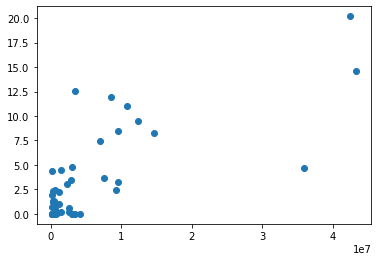

In [86]:
salary_resultss = salary_results.groupby('Driver').mean()
x = salary_resultss['Salary']
y = salary_resultss['PTS']

plt.scatter(x,y)

In [88]:
salary_results['Cost per Point'] = salary_results['Salary']/salary_results['PTS']
salary_results.head()

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained,Salary,Cost per Point
0,Sebastian Vettel,Red Bull Racing Renault,58.0,1:29:30.259,25,1.0,1,2011,0.0,9280000,371200.000000
1,Sebastian Vettel,Red Bull Racing Renault,56.0,1:37:39.832,25,1.0,1,2011,0.0,9280000,371200.000000
2,Sebastian Vettel,Red Bull Racing Renault,56.0,+5.198s,18,1.0,2,2011,-1.0,9280000,515555.555556
3,Sebastian Vettel,Red Bull Racing Renault,58.0,1:30:17.558,25,1.0,1,2011,0.0,9280000,371200.000000
4,Sebastian Vettel,Red Bull Racing Renault,66.0,1:39:03.301,25,2.0,1,2011,1.0,9280000,371200.000000


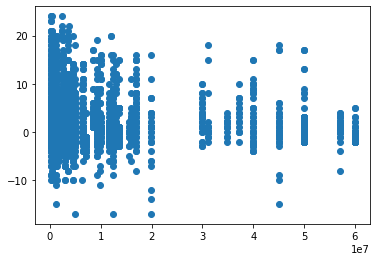

In [92]:
x=salary_results['Salary']
y=salary_results['Positions Gained']
plt.scatter(x,y)

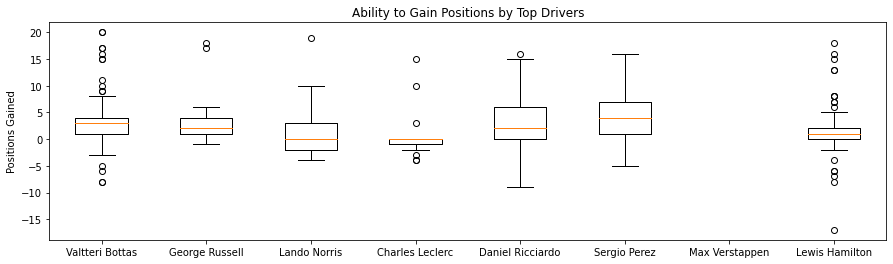

In [108]:
drivers = ['Valtteri Bottas','George Russell','Lando Norris','Charles Leclerc','Daniel Ricciardo','Sergio Perez',
           'Max Verstappen','Lewis Hamilton']
driver_list =[]
for driver in drivers:
    driver_df = salary_resultss[salary_results['Driver']==driver]
    driver_list.append(driver_df['Positions Gained'])

plt.boxplot(driver_list)
driver_labels = (drivers)
plt.xticks(np.arange(len(drivers))+1,drivers)
plt.ylabel('Positions Gained')
plt.title("Ability to Gain Positions by Top Drivers")
plt.show()

In [103]:
#drop players with zero points from Cost per Point analysis
salary_cleaned = salary_results[salary_results['Cost per Point']!=np.inf]
salary_cleaned = salary_cleaned.dropna()
salary_cleaned.head()

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained,Salary,Cost per Point
0,Sebastian Vettel,Red Bull Racing Renault,58.0,1:29:30.259,25,1.0,1,2011,0.0,9280000,371200.000000
1,Sebastian Vettel,Red Bull Racing Renault,56.0,1:37:39.832,25,1.0,1,2011,0.0,9280000,371200.000000
2,Sebastian Vettel,Red Bull Racing Renault,56.0,+5.198s,18,1.0,2,2011,-1.0,9280000,515555.555556
3,Sebastian Vettel,Red Bull Racing Renault,58.0,1:30:17.558,25,1.0,1,2011,0.0,9280000,371200.000000
4,Sebastian Vettel,Red Bull Racing Renault,66.0,1:39:03.301,25,2.0,1,2011,1.0,9280000,371200.000000


In [104]:
len(salary_cleaned)

1515

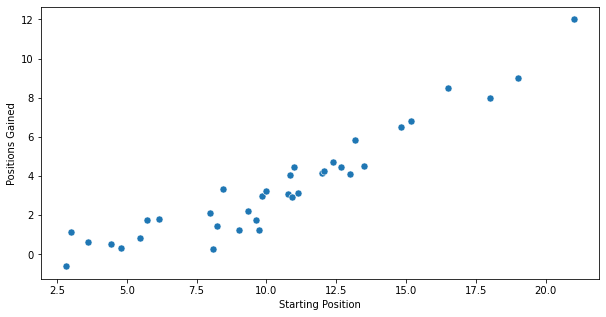

In [124]:
driver_avg = salary_cleaned.groupby('Driver').mean()
x= driver_avg['Starting Position']
y=driver_avg['Positions Gained']
sns.scatterplot(x=x,y=y,data=salary_cleaned,s=50)
plt.rcParams["figure.figsize"] = [5, 5]

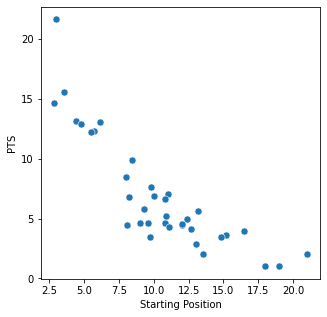

In [125]:
driver_avg = salary_cleaned.groupby('Driver').mean()
x= driver_avg['Starting Position']
y=driver_avg['PTS']
sns.scatterplot(x=x,y=y,data=salary_cleaned,s=50)
plt.rcParams["figure.figsize"] = [5, 5]